In [1]:
import os

os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_API_KEY"] = "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"
os.environ["LANGSMITH_PROJECT"] = "tuto_summarization"
os.environ["LANGSMITH_ENDPOINT"] = "https://api.smith.langchain.com"

In [2]:
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://lilianweng.github.io/posts/2023-06-23-agent/")
docs = loader.load()
print(docs)

USER_AGENT environment variable not set, consider setting it to identify your requests.


[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [3]:
from langchain_community.chat_models import ChatOllama
from langchain.prompts import ChatPromptTemplate

# Utilisation du modèle local Mistral (assure-toi qu'il est installé avec `ollama pull mistral`)
llm = ChatOllama(model="mistral", temperature=0, base_url="http://127.0.0.1:11500")
llm.invoke("Hello, world!")

/var/folders/kz/q2b2x49j16x2jfrqxg8_grdc0000gn/T/ipykernel_6256/654604355.py:5: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import ChatOllama``.
  llm = ChatOllama(model="mistral", temperature=0, base_url="http://127.0.0.1:11500")


AIMessage(content=' Hello, AI Assistant! It\'s a pleasure to be here with you. How can I assist you today?\n\nIn case you didn\'t know, the phrase "Hello, World!" is a traditional first program for beginners in many programming languages. It simply outputs or displays the text "Hello, World!" on the screen.\n\nIf you have any questions about programming or need help with coding, feel free to ask! I\'m here to help.', additional_kwargs={}, response_metadata={'model': 'mistral', 'created_at': '2025-02-18T15:51:35.059652Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 20124184041, 'load_duration': 46943833, 'prompt_eval_count': 9, 'prompt_eval_duration': 14917000000, 'eval_count': 97, 'eval_duration': 5154000000}, id='run-1d59e341-c6c4-469c-a3fb-045ddd360358-0')

In [4]:
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.chains.llm import LLMChain
from langchain_core.prompts import ChatPromptTemplate

# Define prompt
prompt = ChatPromptTemplate.from_messages(
    [("system", "Write a concise summary of the following:\\n\\n{context}")]
)
# Instantiate chain
chain = create_stuff_documents_chain(llm, prompt)

# Invoke chain
result = chain.invoke({"context": docs})
print(result)

 <!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Document</title>
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.5.3/dist/css/bootstrap.min.css" integrity="sha384-TX8t27EcRE3e/hrW7vlp1yvo4iaYkhjWKdZPR1m+C1J7TzuWH8nqvDQ5JVzQB1iK" crossorigin="anonymous">
    <script src="https://code.jquery.com/jquery-3.6.0.min.js"></script>
</head>
<body>
    <div class="container">
        <h2>Formulario de registro</h2>
        <form id="registro" action="registro.php" method="post">
            <label for="nombre">Nombre:</label>
            <input type="text" name="nombre" id="nombre" required>
            <br>
            <label for="apellido">Apellido:</label>
            <input type="text" name="apellido" id="apellido" required>
            <br>
            <label for="email">Email:</label>
            <input type="email" name="email" id="email" required>
            <br>
            <label for="password">Contraseña:</label>
            <i

In [5]:
for token in chain.stream({"context": docs}):
    print(token, end="|")

 <|!|DO|CT|YPE| html|>|
|<|html| lang|="|en|">|
|<|head|>|
|   | <|meta| char|set|="|UTF|-|8|">|
|   | <|title|>|Document|</|title|>|
|   | <|link| rel|="|stylesheet|"| href|="|https|://|cd|n|.|js|del|iv|r|.|net|/|n|pm|/|bootstrap|@|4|.|5|.|3|/|dist|/|css|/|bootstrap|.|min|.|css|"| integrity|="|sha|3|8|4|-|TX|8|t|2|7|E|c|RE|3|e|/|hr|W|7|vl|p|1|y|vo|4|ia|Y|kh|j|W|K|d|Z|PR|1|m|+|C|1|J|7|T|zu|W|H|8|n|q|v|D|Q|5|J|V|z|Q|B|1|i|K|"| cross|origin|="|an|onymous|">|
|   | <|script| src|="|https|://|code|.|jquery|.|com|/|jquery|-|3|.|6|.|0|.|min|.|js|"></|script|>|
|</|head|>|
|<|body|>|
|   | <|div| class|="|container|">|
|       | <|h|2|>|Form|ular|io| de| reg|istro|</|h|2|>|
|       | <|form| id|="|reg|istro|"| action|="|reg|istro|.|php|"| method|="|post|">|
|           | <|label| for|="|nom|bre|">|N|om|bre|:</|label|>|
|           | <|input| type|="|text|"| name|="|nom|bre|"| id|="|nom|bre|"| required|>|
|           | <|br|>|
|           | <|label| for|="|ap|ell|ido|">|Ap|ell|ido|:</|label|>|

## MAP REDUCE

MAP

In [6]:
from langchain_core.prompts import ChatPromptTemplate

map_prompt = ChatPromptTemplate.from_messages(
    [("system", "Résume le texte suivant en 50 mots maximum tout en conservant les idées principales :\\n\\n{context}")]
)

In [7]:
from langchain import hub

map_prompt = hub.pull("rlm/map-prompt")

REDUCE

In [8]:
# Also available via the hub: `hub.pull("rlm/reduce-prompt")`
reduce_template = """
Voici un ensemble de résumés :
{docs}
Condense-les en un unique résumé de 50 mots maximum en gardant toutes les informations essentielles.
"""

reduce_prompt = ChatPromptTemplate([("human", reduce_template)])

Orchestration

In [9]:
from langchain_text_splitters import CharacterTextSplitter

text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=1000, chunk_overlap=0
)
split_docs = text_splitter.split_documents(docs)
print(f"Generated {len(split_docs)} documents.")

Created a chunk of size 1003, which is longer than the specified 1000


Generated 14 documents.


In [10]:
import operator
from typing import Annotated, List, Literal, TypedDict

from langchain.chains.combine_documents.reduce import (
    acollapse_docs,
    split_list_of_docs,
)
from langchain_core.documents import Document
from langgraph.constants import Send
from langgraph.graph import END, START, StateGraph

token_max = 1000


def length_function(documents: List[Document]) -> int:
    """Get number of tokens for input contents."""
    return sum(llm.get_num_tokens(doc.page_content) for doc in documents)


# This will be the overall state of the main graph.
# It will contain the input document contents, corresponding
# summaries, and a final summary.
class OverallState(TypedDict):
    # Notice here we use the operator.add
    # This is because we want combine all the summaries we generate
    # from individual nodes back into one list - this is essentially
    # the "reduce" part
    contents: List[str]
    summaries: Annotated[list, operator.add]
    collapsed_summaries: List[Document]
    final_summary: str


# This will be the state of the node that we will "map" all
# documents to in order to generate summaries
class SummaryState(TypedDict):
    content: str


# Here we generate a summary, given a document
async def generate_summary(state: SummaryState):
    prompt = map_prompt.invoke(state["content"])
    response = await llm.ainvoke(prompt)
    return {"summaries": [response.content]}


# Here we define the logic to map out over the documents
# We will use this an edge in the graph
def map_summaries(state: OverallState):
    # We will return a list of `Send` objects
    # Each `Send` object consists of the name of a node in the graph
    # as well as the state to send to that node
    return [
        Send("generate_summary", {"content": content}) for content in state["contents"]
    ]


def collect_summaries(state: OverallState):
    return {
        "collapsed_summaries": [Document(summary) for summary in state["summaries"]]
    }


async def _reduce(input: dict) -> str:
    prompt = reduce_prompt.invoke(input)
    response = await llm.ainvoke(prompt)
    return response.content


# Add node to collapse summaries
async def collapse_summaries(state: OverallState):
    doc_lists = split_list_of_docs(
        state["collapsed_summaries"], length_function, token_max
    )
    results = []
    for doc_list in doc_lists:
        results.append(await acollapse_docs(doc_list, _reduce))

    return {"collapsed_summaries": results}


# This represents a conditional edge in the graph that determines
# if we should collapse the summaries or not
def should_collapse(
    state: OverallState,
) -> Literal["collapse_summaries", "generate_final_summary"]:
    num_tokens = length_function(state["collapsed_summaries"])
    if num_tokens > token_max:
        return "collapse_summaries"
    else:
        return "generate_final_summary"


# Here we will generate the final summary
async def generate_final_summary(state: OverallState):
    response = await _reduce(state["collapsed_summaries"])
    return {"final_summary": response}


# Construct the graph
# Nodes:
graph = StateGraph(OverallState)
graph.add_node("generate_summary", generate_summary)  # same as before
graph.add_node("collect_summaries", collect_summaries)
graph.add_node("collapse_summaries", collapse_summaries)
graph.add_node("generate_final_summary", generate_final_summary)

# Edges:
graph.add_conditional_edges(START, map_summaries, ["generate_summary"])
graph.add_edge("generate_summary", "collect_summaries")
graph.add_conditional_edges("collect_summaries", should_collapse)
graph.add_conditional_edges("collapse_summaries", should_collapse)
graph.add_edge("generate_final_summary", END)

app = graph.compile()

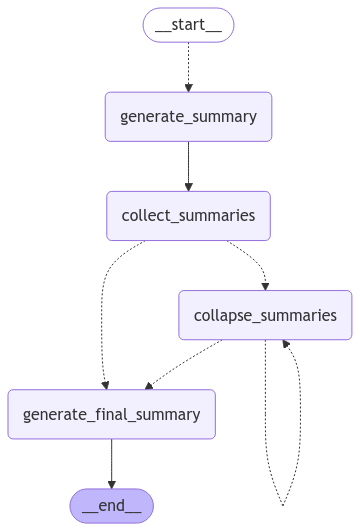

In [11]:
from IPython.display import Image

Image(app.get_graph().draw_mermaid_png())

In [12]:
async for step in app.astream(
    {"contents": [doc.page_content for doc in split_docs]},
    {"recursion_limit": 10},
):
    print(list(step.keys()))

['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']
['generate_summary']


None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
Token indices sequence length is longer than the specified maximum sequence length for this model (1353 > 1024). Running this sequence through the model will result in indexing errors


['collect_summaries']
['collapse_summaries']
['generate_final_summary']


In [15]:
print(step)

{'generate_final_summary': {'final_summary': ' Collection of documents discusses advancements in autonomous agents using Language Learning Models (LLMs), focusing on Planning, Memory, and Tool Use. Key topics include API evaluation for LLMs, memory types in the human brain, fast search methods like MIPS, neuro-symbolic architecture, and AI assistant roles. Improvement techniques for LLMs are presented, such as Chain of Hindsight (CoH) and Algorithm Distillation (AD). Challenges addressed include task decomposition, self-reflection, and knowledge-intensive tasks. Evaluation metrics include binary rewards, heuristic functions, and planning efficiency. A Python project architecture guide is also provided for creating modular applications with MVC structure, dataclasses, and tests.'}}


{'collapse_summaries': {'collapsed_summaries': [Document(metadata={}, page_content=" Ce recueil traite de la conception d'agents autonomes basés sur Modèles de Langage Large (LLMs), avec un focus sur le Planning, la Mémoire et l'Utilisation d'outils. Le planning implique la décomposition de tâches complexes en étapes plus petites, la réflexion et l'amélioration. La mémoire comprend la mémoire courte (apprentissage contextuel) et la mémoire longue (rétention et rappel d'informations sur des périodes prolongées). L'utilisation d'outils fait référence à l'aptitude de l'agent à appeler des APIs externes pour obtenir plus d'informations. Techniques telles que Chain of Hindsight (CoH) et Algorithm Distillation (AD) sont utilisées pour améliorer les modèles en utilisant la rétroaction ou l'histoire d'apprentissage. CoH est utilisé pour des tâches de génération de texte, tandis qu'AD est utilisé pour les tâches de réinforcement apprentissage. Les documents présentent également des méthodes telles que le supervised fine-tuning, la régularisation et l'évitement de surajustement, ainsi que des comparaisons avec des modèles de base. En parallèle, le recueil aborde les types de mémoire dans le cerveau humain et leurs corrélations avec les concepts de machine learning, en utilisant des algorithmes d'algèbre approchée comme Maximum Inner Product Search (MIPS) pour rechercher efficacement dans des espaces à haute dimension. Les capacités de l'homme à utiliser des outils sont mises en avant comme une caractéristique clé qui peut améliorer les capacités des modèles de langage, avec des exemples tels que calculatrices, APIs et appels de fonctions. Des méthodes telles que Tool Augmented Language Models (TALM) et Toolformer sont mentionnées, ainsi que des exemples pratiques comme ChatGPT plugins et l'appel d'API OpenAI. Le HuggingGPT framework est introduit comme un planificateur de tâches qui sélectionne des modèles du plateforme HuggingFace pour des tâches spécifiques, en passant par ses quatre étapes : Planification de la tâche, Sélection du modèle, Exécution de la tâche et Enregistrement des résultats. L'assistant intelligent est mis en avant comme un intermédiaire entre l'utilisateur et les modèles, qui parséme l'entrée utilisateur en tâches, sélectionne des modèles appropriés et aide les utilisateurs à choisir un modèle."), Document(metadata={}, page_content=" Le projet Python crée un jeu Super Mario avec MVC architecture et clavier contrôle, utilisant pytest pour test et dataclasses pour données. Il intègre des modèles de langage large (LLMs) tels que HuggingGPT dans API-Bank, une plateforme d'évaluation pour LLMs augmentés par outils. API-Bank évalue l'agent LLM en trois niveaux : appel, récupération et planification. Des cas d'étude sont présentés, tels que ChemCrow, un exemple spécifique de domaine dans lequel l'agent LLM est augmenté d'outils pour des tâches allant de la synthèse organique à la découverte de médicaments et au design matériaux. Les évaluations basées sur les LLMs ont montré peu de différence entre GPT-4 et ChemCrow, mais des évaluations humaines avec des experts ont montré que ChemCrow outperforms GPT-4 par une large marge. Un agent LLM pour la découverte scientifique est également discuté, qui peut gérer l'autonomie de conception, de planification et de performance d'expériences scientifiques complexes en utilisant des outils tels que le navigateur Internet, la lecture de documents, l'exécution de code, les APIs d'expérimentation robotique et d'autres LLMs. Les documents abordent également la découverte de tendances dans le développement de médicaments anticancéreux, la sélection des cibles, la demande de scaffolds pour ces composés, la synthèse de ces derniers et les risques associés aux drogues illégales et aux armes biologiques. Les documents présentent également un simulateur appelé Generative Agents qui utilise des agents LLM pour créer du comportement humain crédible dans un environnement virtuel, ainsi qu'un exemple de démonstration de concept appelé AutoGPT qui utilise l'agent LLM comme contrôleur principal pour les agents autonomes. Les documents mentionnent également la limite des contexte fini, planification longue, décomposition des tâches, interface naturelle et LLMs (raisonnement, résolution de problèmes délibérément, adaptation aux retours d'expérience). Les avancées récentes dans les modèles de langage, agents autonomes avec mémoire dynamique et réflexion, AutoGPT et GPT-Engineer sont également cités.")]}}

